In [ ]:
import nltk
nltk.download('omw-1.4')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from pprint import pprint
import nltk.corpus
from nltk.text import Text
import pandas as pd
from nltk import FreqDist
import matplotlib.pyplot as plt
import numpy as np
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')


# Read json file

import json

articles_df = pd.read_json('trainingDocs.json')

content = articles_df['text']
ids = articles_df['Id']
test = content.head()
words = []
for row in content:
    row.strip()
    words.append(row)

# Stopwords
test_list = ' '.join(words)
nltk_stoplist = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
                 "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
                 "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
                 "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
                 "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
                 "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
                 "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
                 "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
                 "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
                 "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]


onlyNLTK_filtered = []
tokenized = word_tokenize(test_list)
stop_words = list(stopwords.words("english"))

for word in tokenized:
    if word.casefold() not in stop_words:
        onlyNLTK_filtered.append(word)

extra = ['said','one','would','also','get','may','two','like','could',',','.',':','(',')',';','include',
        'includes','&','and/or','limited']

for i in extra:
    stop_words.append(i)
filtered_list = []

# Remove stopwords
for word in tokenized:
    if word.casefold() not in stop_words:
        filtered_list.append(word)

# Lemmatizing for frequency distribution
lemmatizer = WordNetLemmatizer()
final_tweets = [lemmatizer.lemmatize(word) for word in filtered_list]


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


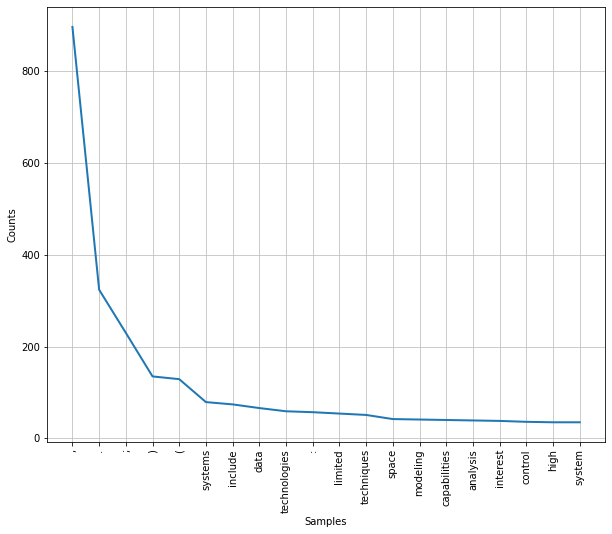

[(',', 897), ('.', 324), (';', 230), (')', 135), ('(', 129), ('systems', 79), ('include', 74), ('data', 66), ('technologies', 59), (':', 57), ('limited', 54), ('techniques', 51), ('space', 42), ('modeling', 41), ('capabilities', 40), ('analysis', 39), ('interest', 38), ('control', 36), ('high', 35), ('system', 35), ('advanced', 34), ('environments', 33), ('target', 33), ('including', 33), ('enable', 29)]
100
           ,            .            ;            )            (      systems      include         data technologies 
         897          324          230          135          129           79           74           66           59 


In [ ]:
# Frequency distribution with only NLTK stoplist
frequency_distribution = FreqDist(onlyNLTK_filtered)

plt.figure(figsize=(10, 8))
frequency_distribution.plot(20)

print(frequency_distribution.most_common(25))
print(len(ids))

frequency_distribution.tabulate(9)

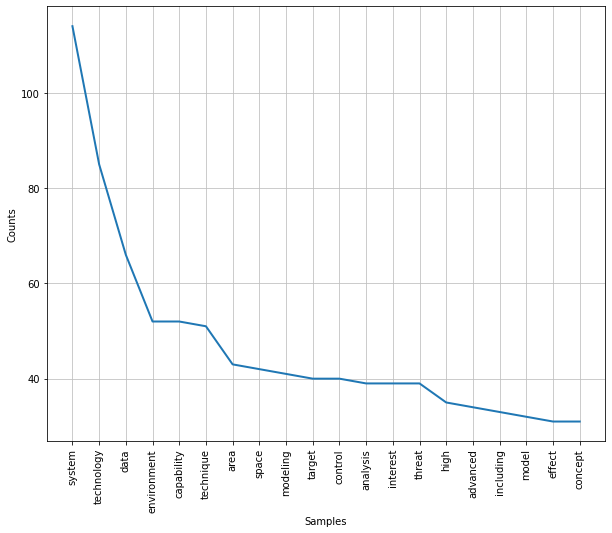

[('system', 114), ('technology', 85), ('data', 66), ('environment', 52), ('capability', 52), ('technique', 51), ('area', 43), ('space', 42), ('modeling', 41), ('target', 40), ('control', 40), ('analysis', 39), ('interest', 39), ('threat', 39), ('high', 35), ('advanced', 34), ('including', 33), ('model', 32), ('effect', 31), ('concept', 31), ('simulation', 30), ('enable', 29), ('sensor', 29), ('process', 29), ('performance', 29)]
100
     system  technology        data environment  capability   technique        area       space    modeling 
        114          85          66          52          52          51          43          42          41 


In [ ]:
# Frequency distribution with our updated stoplist
frequency_distribution = FreqDist(final_tweets)

plt.figure(figsize=(10, 8))
frequency_distribution.plot(20)

print(frequency_distribution.most_common(25))
print(len(ids))

frequency_distribution.tabulate(9)

In [ ]:
# Customized Sentiment Analysis

from nltk.sentiment import SentimentIntensityAnalyzer
from statistics import mean
from random import shuffle
from nltk import NaiveBayesClassifier as nbc
from itertools import chain


sia = SentimentIntensityAnalyzer()


# Read in KeyTerms
# This is where the user can read in their own keyterms txt file or add them to the keyTerms list

keyTerms=[]
with open('listOfKeyWords.txt') as f:
    line = f.readline()
    while line:
        line = f.readline()
        keyTerms.append(line)
keyTerms=[line.rstrip('\n') for line in keyTerms]

# Define positive and negative words

positive = ['Artificial Intelligence', 'AI', 'Artificial', 'Intelligence', 'Machine Learning', 'Machine', 'Learning',
            'ML', 'AI ML', 'AI ML platform', 'platform as a service', 'PaaS', 'data engineering', 'knowledge graph',
            'ontological', 'ontology', 'DEVOPS', 'DEVSECOPS', 'DEV OPS', 'DEV SEC OPS', 'cloud', 'cloud computing',
            'tactical edge', 'denied, degraded, intermittent, or limited', 'DDIL', 'modular open systems appraoch',
            'detection', 'tracking', 'streams', 'streaming', 'decision making', 'sensors', 'sensor fusion',
            'publicly available information', 'algorithm', 'algorithms', 'model', 'models', 'learning', 'pipeline',
            'architecture', 'learning', 'learn', 'train', 'training', 'data science', 'mathematics','probability'
            'probabilities', 'infrastructure', 'computer vision', 'sensor fusion', 'Internet of Things', 'IOT',
            'near real time']
positive = keyTerms

# Where the user can input their negative words

negative = ['including','meteorological','atmospheric','photometry', 'sun', 'ceilometer','radiance','weather','orbit',
            'astrodynamics', 'turbulence','thermometry', 'illumination','traffic', 'debris','ballistic', 'hypersonic',
            'missile','phenomenology', 'rocket', 'vehicle', 'temperature','microelectronics','propulsion',
            'propellants','green','cryogenic','spacecraft','lightning','thermal','hypersonic','beryllium',
            'epitaxy','nanomaterials','meta-materials','ceramic','environmental', 'weapon','shooter','microwave',
            'laser','waveform','antenna','telescopes','infrared','airborne','spacecraft']

# Where the user can input their neutral words

neutral = ['career', 'experiences', 'experience', 'job','work','waveform', 'Waveform', 'waveforms', 'medical']
unwanted = stop_words
for word in neutral:
  negative.append(word)



# Methods to calculate scores

# This was the method only using NLTKS built in sia
def extract_features(text):
    features = dict()
    pos_wordcount = 0
    neg_wordcount=0
    compound_scores = list()
    positive_scores = list()

    for sentence in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sentence):
            if word.lower() in positive:
                pos_wordcount += 1
            if word.lower() in negative:
                neg_wordcount+=1
        compound_scores.append(sia.polarity_scores(sentence)["compound"])
        positive_scores.append(sia.polarity_scores(sentence)["pos"])


    features["compound"] = mean(compound_scores) + 1
    features["mean_positive"] = mean(positive_scores)
    features["Poswordcount"] = pos_wordcount
    features["Negwordcount"] = neg_wordcount

    return features

# Our extract features using the average formula: Our final method
def extract_featuresAverage(text):
    features = dict()
    pos_wordcount = 0
    neg_wordcount = 0
    compound_scores = 1
    docLength = len(text)

    for sentence in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sentence):
            if word.lower() in positive:
                if(word.lower() == 'artificial' or word.lower() == 'ai' or word.lower()== 'machine' or word.lower() == 'cloud' or word.lower() == 'data' or word.lower() == 'intelligence' or word.lower() == 'learning' or word.lower() == 'ml'):
                  pos_wordcount+=2
                else:
                  pos_wordcount+=1

            if word.lower() in negative:
                neg_wordcount+=1

    compound_scores = (pos_wordcount-neg_wordcount)/docLength
    features["Compound"] = compound_scores
    features["Pos_wordcount"] = pos_wordcount
    features["Neg_wordcount"] = neg_wordcount

    return features

#Our extract features method using the ratio formula, which we decide to not use
def extract_featuresRatio(text):
    features = dict()
    pos_wordcount = 0
    neg_wordcount = 0
    compound_scores = 1

    for sentence in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sentence):
            if word.lower() in positive:
                pos_wordcount += 1
            if word.lower() in negative:
                neg_wordcount+=1

    comound_scores = pos_wordcount/(neg_wordcount+1)
    features["Compound"] = compound_scores
    features["Pos_wordcount"] = pos_wordcount
    features["Neg_wordcount"] = neg_wordcount

    return features


# Labled every doc in the solicitation data set as pos or neg for training

training_data=[(content[0],'pos'),(content[1],'pos'),(content[2],'pos'),(content[3],'neg'),(content[4],'neg'),
               (content[5],'pos'),(content[6],'pos'),(content[7],'pos'),(content[8],'pos'),(content[9],'pos'),
               (content[10],'pos'),(content[11],'pos'),(content[12],'pos'),(content[13],'pos'),(content[14],'neg'),
               (content[15],'pos'),(content[16],'pos'), (content[17],'pos'),(content[18],'neg'), (content[19],'pos'),
               (content[20],'pos'),(content[21],'neg'),(content[22],'pos'),(content[23],'neg'),(content[24],'neg'),
               (content[25],'pos'),(content[26],'pos'),(content[27],'pos'),(content[28],'neg'),(content[29],'neg'),
               (content[30],'neg'),(content[31],'neg'),(content[32],'neg'),(content[33],'pos'),(content[34],'neg'),
               (content[35],'pos'),(content[36],'neg'),(content[37],'neg'), (content[38],'pos'),(content[39],'pos'),
               (content[40],'pos'),(content[41],'pos'),(content[42],'pos'),(content[43],'neg'),(content[44],'neg'),
               (content[45],'neg'),(content[46],'neg'),(content[47],'neg'),(content[48],'pos'),(content[49],'neg'),
               (content[50],'neg'), (content[51],'neg'), (content[52],'neg'), (content[53],'neg'),(content[54],'neg'),
               (content[55],'neg'), (content[56],'pos'), (content[57],'neg'), (content[58],'pos'),(content[59],'neg'),
               (content[60], 'neg'), (content[61],'neg'), (content[62],'neg'), (content[63],'neg'), (content[64],'neg'),
               (content[65],'pos'),(content[66],'neg'), (content[67],'neg'), (content[68],'pos'),(content[69],'neg'),
               (content[70],'pos'), (content[71],'neg'), (content[72],'neg'), (content[73],'neg'), (content[74],'pos'),
               (content[75],'neg'), (content[76],'neg'), (content[77], 'neg'), (content[78], 'neg'), (content[79],'neg'),
               (content[80],'neg'), (content[81],'neg'), (content[82],'neg'), (content[83],'neg'), (content[84],'neg'),
               (content[85],'neg'), (content[86], 'neg'), (content[87], 'neg'), (content[88],'neg'), (content[89],'neg'),
               (content[90], 'neg'), (content[91],'neg'), (content[92],'pos'), (content[93],'neg'), (content[94],'neg'),
               (content[95], 'neg'), (content[96],'neg'), (content[97],'neg'), (content[98],'pos'), (content[99],'neg')]


featuresListAverage = training_data

# Extracting features for the docs in training set

count=0
for doc,tag in featuresListAverage:
    if tag=='pos':
        featuresListAverage[count]= [extract_featuresAverage(doc),'pos']
    elif tag=='neg':
        featuresListAverage[count]= [extract_featuresAverage(doc),'neg']

    count+=1
    #print("\n")

# Calculating score distribution

scores_dist=np.zeros(100)
count=0
for features,tag in featuresListAverage:
  for element in features:
    if element == 'Compound':
      scores_dist[count]=features[element]
  count+=1

print("\n")

# Training the NaiveBayesClassifier
train_count = 80
shuffle(featuresListAverage)
classifier = nltk.NaiveBayesClassifier.train(featuresListAverage[:train_count])
classifier.show_most_informative_features(5)
print(nltk.classify.accuracy(classifier, featuresListAverage[train_count:]))

# Testing classifier on winning documents
new_solicitation = extract_featuresAverage("The following applies to DoD components utilizing this BOA: DoD AI data services acquired or developed under this PWS and data processed by those services will frequently be required to integrate and interoperate with new or existing AI cloud platforms. In almost all cases, AI data acquired, curated, and prepared under this BOA will be required to align with published Government standards and practices for data and metadata tagging and semantics. In most cases, AI data produced under this BOA will be required to be made available on cloud platforms for reuse in other AI projects. In many cases, AI data tools and services developed under this BOA will be required to align with and conform to published Government technical and security standards and support new or existing AI DevSecOps workflows, and in some cases may be required to be integrated into new or existing AI solutions and data pipelines. DoD components and other users are encouraged to utilize the Intellectual Property (IP) language specified in the ordering guide at the task level order. The types of activities anticipated for aligning and/or integrating AI data and AI data tools and services include, but are not limited to, the following: Curating and preparing AI data in accordance with DoD or Government specified AI data and metadata standards. Securing and encrypting AI data at rest in accordance with DoD or Government specified security mechanisms and standards. Securing AI data tools and services in accordance with DoD or Government specified security standards to ensure they meet necessary Impact Level security standards for integration into AI Cloud Platforms. Packaging and delivering AI data tools and services as hardened containers in accordance with DoD or Government specified standards. Packaging AI data tools and services in accordance with DoD or Government defined standards to ensure that they can be successfully integrated into Cloud Platforms and Architectures.  Providing AI data tools and services with DoD or Government specified Application Programming Interfaces (APIs) for supporting data discovery, search, access, and sharing across Cloud Platforms.")
print(classifier.classify(new_solicitation))

new_solicitation2 = extract_featuresAverage("Develop, or demonstrate existing capabilities to create virtual processing networks using the increasing computational capabilities built in to commercially available cell phones. The ability to do secure processing close to the end user presents a rich resource for moving advanced and distributed processing AI/ML closer and closer to the end user. This will decrease the communications burden or bandwidth required while decreasing the time from potential detection to final action. There is a movement to use inexpensive commercial equipment to enable operators in the field. The Android Tactical Assault Kit and it variants are now standard equipment for deploying forces. More specific to DTRA the Joint CTTSO DTRA Joint Operation Center/Tactical Assault Kit project provides sharing of imagery, planning tools, planning fragments, standard formatted request and report messages, language translation, and many additional operator developed capabilities. The old Galaxy S10 phones used with JOCTAK include dual CPU processors, 16 megapixel cameras, and at least 128 GB of ram The newer S21 version includes the faster dual processors, up to 512 GB of ram, a 40 MP Camera, dual encryption chips, and 5G capability 1. 2. Each generation provides more capability without development cost to the end user. The goal of this SBIR/SSTR topic is to explore harvesting and applying computational capabilities available in the current and next generation of cell phones used in DTRA Tactical Assault Kits, the Joint Operations Center Tactical Assault Kit (JOCTAK) and with the AI/ML capabilities under research in other parts of CX. The emerging application and use of TAK/ATAK with the emergence of Civilian Tactical Assault Kit or the Team Awareness Kit is indicative of the commercial application of this research. Shall execute an Analysis of Alternatives (AofA) and produce a Proof of Concept (PoC) implementation and architecture for creating secure virtual processing networks across commercially available cell phone used in the TAK/JOCTAK3 projects.")
print(classifier.classify(new_solicitation2))

new_solicitation3 = extract_featuresAverage("Each Coast Guard Command Center has a human listening to radio distress frequencies - namely listening to static for 12 hours per day. This is a monotonous, but a critical duty. Because of the nature of these calls, and the numerous hoax calls, it is often difficult for a human to glean the criticality of these calls and get all the required information from them. The challenge is a watchstander may be less attentive after spending 12 hours throughout the day listening for distress activities. An Artificial Intelligence (AI) system could consume the audio, analyze the audio in real time, learn to detect a real call from a hoax, and then send the information to a watchstander. This system could alleviate hundreds of watchstanding positions therefore, making Search and Rescue (SAR) distress monitoring much more successful. An Artificial Intelligence/Machine Learning (AI/ML) system could listen to thousands of historical calls to learn proper detection techniques and utilize voice inflection technology to greatly improve existing capabilities. The AI/ML system would need to cue watchstanders and potentially initiate processes such as initiating a case file within the Marine Information for Safety and Law Enforcement (MISLE) database. Connection to standard Coast Guard networks such as CG1View may be necessary for watchstander cuing through an existing platform. Potential use cases should be evaluated to determine future opportunities and connectivity requirements.Voice and acoustic forensics applications already exist and have been used to evaluate known hoax maritime distress calls. This capability was employed after repeat hoax calls had already become a problem in a specific location. In this case, a specific individual had made several hoax calls costing the U.S. Coast Guard thousands of dollars in response operations. Recorded audio files were analyzed to identify acoustic characteristics that helped prosecute this hoax call case and others like it. Rather than waiting to use this technology on the back end as in this example, proactively employing voice forensics in radio frequency monitoring technology could cue watchstanders to anomalies that could possibly be associated with hoax calls. Additional potential use cases such as the acoustic detection of intoxicated mariners and subsequent cuing to watchstanders should be evaluated. Acoustic forensics and AI technologies should be evaluated for their ability to account for and differentiate between other variables that may be encountered such as different regional dialects and accents. For the proposed solution, an AI/ML application would monitor radio frequencies, relieving watchstanders from the tedious task of listening for hours where cost and time savings could be realized by employing Coast Guard personnel with other mission critical tasks. For initial capability exploration, the AI/ML should monitor VHF distress frequencies between 4 and 10 MHz. VHF Channel 16 is the single channel within this range, but there are several simultaneous sources from different Rescue 21 towers. Building upon the initial capability, AI/ML monitoring could be expanded into the UHF or other Coast Guard VHF working channels. Develop proposed concept design for voice and acoustic forensics applications to be used for monitoring of radio frequencies. The system design should include radio distress call analysis and watchstander cueing. The resulting Phase I proof of feasibility should demonstrate a system design that can be developed and tested which integrates artificial intelligence (AI) and machine learning (ML) to monitor radio calls and differentiate hoax calls from legitimate calls via voice and acoustic forensics.")
print(classifier.classify(new_solicitation3))





Most Informative Features
           Pos_wordcount = 0                 neg : pos    =      6.6 : 1.0
           Pos_wordcount = 4                 pos : neg    =      3.8 : 1.0
           Pos_wordcount = 3                 pos : neg    =      3.3 : 1.0
                Compound = 0.0               neg : pos    =      2.9 : 1.0
           Neg_wordcount = 0                 pos : neg    =      1.7 : 1.0
0.7
pos
pos
neg


[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'Score Distribution')]

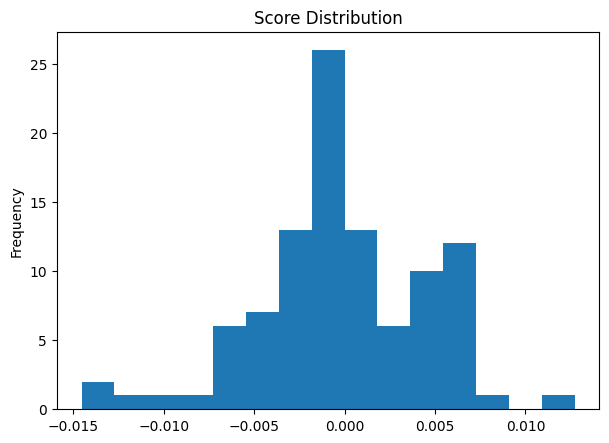

In [ ]:
# Plot score distribution

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = scores_dist
#print(scores_dist)
plt.hist(x, bins=15)
plt.gca().set(title='Score Distribution', ylabel='Frequency')


In [ ]:
# Print results in descending order by score

print(scores_dist)

d = {'Doc': content, 'Score': scores_dist}

df = pd.DataFrame(d,columns=['Doc','Score'])
df

# sort_values()
df.sort_values(by=['Score'],ascending=False)

[ 0.00338983  0.          0.         -0.002       0.         -0.00123305
  0.00646552  0.00613497  0.00677201  0.00874636  0.00573066  0.00638978
  0.00548446  0.00565611  0.00457875  0.00387097  0.00442804  0.00455373
  0.00548948  0.00253807  0.00105263  0.00191571  0.00559441  0.00144092
 -0.0021645   0.00721501 -0.00239808  0.00502513  0.         -0.0005685
  0.00046773 -0.00625711  0.00047687  0.00053419  0.          0.00189994
 -0.00657895 -0.00125549  0.00110011  0.00459418  0.00684932  0.00456621
  0.00456621  0.          0.         -0.00892857  0.00149477  0.
  0.          0.          0.          0.         -0.00257069  0.
 -0.00285714  0.         -0.00252525  0.00397614  0.00173913  0.
  0.00134228 -0.00530504  0.00188679  0.         -0.00056117  0.00156495
 -0.00374532 -0.00564972  0.00294985  0.          0.00630517 -0.00218341
 -0.00576132 -0.00125549  0.00110011  0.00459418 -0.00243902  0.
 -0.00461361 -0.0027972  -0.00657895 -0.00508475  0.          0.
 -0.00314136 -0.005

,Doc,Score
98,Technical solutions should conceive and addres...,0.012723
9,This area focuses on enhancing repair material...,0.008746
25,Exploitation of enemy threat systems includes ...,0.007215
40,Areas of research include but are not limited ...,0.006849
8,This area aims to improve the capability to id...,0.006772
...,...,...
45,Areas of research include but are not limited ...,-0.008929
90,"includes, but is not limited to advanced power...",-0.010345
88,"includes, but is not limited to high temperatu...",-0.012158
97,Technical solutions should address new capabil...,-0.013942


In [ ]:
# Ranking function, takes compound score as a parameter

import math

def rank(x):

    # Establishes constant k per data set
    maxComp = .01272
    k = 9.5 / (1 / (1 + math.exp(-maxComp)))

    # Calculates pre Rank score with sigmoid function and k
    sig = 1 / (1 + math.exp(-x))
    preRank = k * sig

    # Adjusts distance between values
    rank = preRank * (x/maxComp)

    # Ensures minimum of 1
    if (rank < 1):
       return 1

    # Ensures maximum of 10
    if (rank > 10):
       return 10

    # Returns rank rounded to the hundredths place
    return round (rank, 2)

In [ ]:
# Rank each solicitation

ranks=np.zeros(100)
count = 0
for score in scores_dist:
   ranks[count] = rank(score)
   rank(score)
   count += 1

print(ranks)

[2.52 1.   1.   1.   1.   1.   4.81 4.57 5.04 6.52 4.27 4.76 4.08 4.21
 3.41 2.88 3.29 3.39 4.09 1.89 1.   1.42 4.16 1.07 1.   5.37 1.   3.74
 1.   1.   1.   1.   1.   1.   1.   1.41 1.   1.   1.   3.42 5.1  3.4
 3.4  1.   1.   1.   1.11 1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   2.96 1.29 1.   1.   1.   1.4  1.   1.   1.16 1.   1.   2.19 1.
 4.69 1.   1.   1.   1.   3.42 1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.35 1.   1.   1.   1.   1.
 9.5  1.  ]


In [ ]:
# Print in descending order by rank

print(scores_dist)

d = {'Doc': content, 'Score': scores_dist, 'Rank': ranks}

df = pd.DataFrame(d,columns=['Doc','Score','Rank'])
df

# sort_values()
df.sort_values(by=['Score'],ascending=False)

[ 0.00338983  0.          0.         -0.002       0.         -0.00123305
  0.00646552  0.00613497  0.00677201  0.00874636  0.00573066  0.00638978
  0.00548446  0.00565611  0.00457875  0.00387097  0.00442804  0.00455373
  0.00548948  0.00253807  0.00105263  0.00191571  0.00559441  0.00144092
 -0.0021645   0.00721501 -0.00239808  0.00502513  0.         -0.0005685
  0.00046773 -0.00625711  0.00047687  0.00053419  0.          0.00189994
 -0.00657895 -0.00125549  0.00110011  0.00459418  0.00684932  0.00456621
  0.00456621  0.          0.         -0.00892857  0.00149477  0.
  0.          0.          0.          0.         -0.00257069  0.
 -0.00285714  0.         -0.00252525  0.00397614  0.00173913  0.
  0.00134228 -0.00530504  0.00188679  0.         -0.00056117  0.00156495
 -0.00374532 -0.00564972  0.00294985  0.          0.00630517 -0.00218341
 -0.00576132 -0.00125549  0.00110011  0.00459418 -0.00243902  0.
 -0.00461361 -0.0027972  -0.00657895 -0.00508475  0.          0.
 -0.00314136 -0.005

,Doc,Score,Rank
98,Technical solutions should conceive and addres...,0.012723,9.50
9,This area focuses on enhancing repair material...,0.008746,6.52
25,Exploitation of enemy threat systems includes ...,0.007215,5.37
40,Areas of research include but are not limited ...,0.006849,5.10
8,This area aims to improve the capability to id...,0.006772,5.04
...,...,...,...
45,Areas of research include but are not limited ...,-0.008929,1.00
90,"includes, but is not limited to advanced power...",-0.010345,1.00
88,"includes, but is not limited to high temperatu...",-0.012158,1.00
97,Technical solutions should address new capabil...,-0.013942,1.00


In [ ]:
# Print top 10 results

# Getting first 10 rows from df
df_first_10 = df.head(10)

final_results = pd.DataFrame(d,columns=['Doc','Score','Rank'])
final_results = df_first_10

# Printing df_first_10
print(df_first_10)

# Print final results
final_results

                                                 Doc     Score  Rank
0  Methods and approaches to ensure that the DoD ...  0.003390  2.52
1  Develop novel mechanisms to provide assurance ...  0.000000  1.00
2  Microelectronics test and verification methodo...  0.000000  1.00
3  Advanced node microelectronics fabrication and... -0.002000  1.00
4  Innovative design, manufacturing, and assessme...  0.000000  1.00
5  Develop novel mechanisms to provide traceabili... -0.001233  1.00
6  This area addresses excavation activity damage...  0.006466  4.81
7  Research in this area addresses leak detection...  0.006135  4.57
8  This area aims to improve the capability to id...  0.006772  5.04
9  This area focuses on enhancing repair material...  0.008746  6.52


,Doc,Score,Rank
0,Methods and approaches to ensure that the DoD ...,0.003390,2.52
1,Develop novel mechanisms to provide assurance ...,0.000000,1.00
2,Microelectronics test and verification methodo...,0.000000,1.00
3,Advanced node microelectronics fabrication and...,-0.002000,1.00
4,"Innovative design, manufacturing, and assessme...",0.000000,1.00
5,Develop novel mechanisms to provide traceabili...,-0.001233,1.00
6,This area addresses excavation activity damage...,0.006466,4.81
7,Research in this area addresses leak detection...,0.006135,4.57
8,This area aims to improve the capability to id...,0.006772,5.04
9,This area focuses on enhancing repair material...,0.008746,6.52
